# Data set 4<br>
 This dataset included a company's revenue, sales, and costs measured monthly from 2015 until March 2020. It is a fairly small and thin dataset compared to the other datasets, and it was included to test the performance of the ML models when the available records are scarce, which makes it a particularly interesting case study for deletion experiments.<br>
## Preliminaries<br>
Import and load the uses Python packages and modules 

In [1]:
import sys
import os
# Add the parent directory to sys.path
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../main/'))
sys.path.insert(0, parent_directory)
import pandas as pd
import numpy as np
import sim_experiments as smexp_dyn
from datetime import date

Load the data set and prepare it:

In [2]:
df = pd.read_csv("../datasets/ds04-Month_Value_1.csv", index_col="Period")
df.index = pd.to_datetime(df.index,format = '%d.%m.%Y')

In [3]:
X_PS = df.loc[df.index<"2019-01-01",:]
X_NEW = df.loc[df.index>="2019-01-01",:]

Exploratory analysis showing time series decomposigion as an additive model where each time instant ($x_i$) is the addition of a trend component ($T_i$), a seasonal component ($S_i$) and an error component ($E_i$)

In [ ]:
smexp_dyn.plot_time_components_div(df, X_PS.index, X_NEW.index, 12, xplot_ps= X_PS.index,  xplot_rev= X_NEW.index, dsname="ds04comb", 
                                   xtxtsize=5, path_figs="../figures/")

## Primary Source models<br>
Obtain the parameters for the reference batch of data. The function returns a dictionary *ps_dict* with the parameters to compute each one of the drift metrics according to a different ML model and the _indPS_ variable with the indices of the records used for the reference set.<br>

Doing Primary Source Model -- 
N = 48 (50.0 % of total dataset length)
Step [1/6]: Printing the Original Data Set Features =======
Step [1/6]: Starting ...
            Revenue  Sales_quantity  Average_cost  \
count  4.800000e+01        48.00000     48.000000   
mean   2.835996e+07     17275.12500   1655.656252   
std    9.629211e+06      5648.53544    290.373152   
min    1.402148e+07      8314.00000   1110.576805   
25%    2.089564e+07     13364.75000   1454.265668   
50%    2.847630e+07     17071.50000   1620.966299   
75%    3.545174e+07     19776.75000   1881.815645   
max    4.767813e+07     33207.00000   2315.008323   

       The_average_annual_payroll_of_the_region  
count                              4.800000e+01  
mean                               2.836439e+07  
std                                1.009191e+06  
min                                2.740647e+07  
25%                                2.772305e+07  
50%                                2.801321e+07  
75%             

2023-11-28 10:04:06.971371: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Model: "my_ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 8         
                                                                 
 sequential_1 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Best model - DONE
1/1 [==============================] - 0s 55ms/step
Data model -  DONE
Permutation test -  DONE
dE-AE summary: 39.731645345687866 s.; 640 b.
Step [3/6]: Finished.


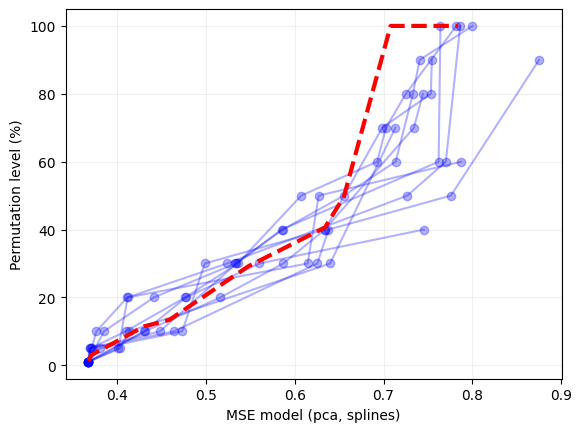

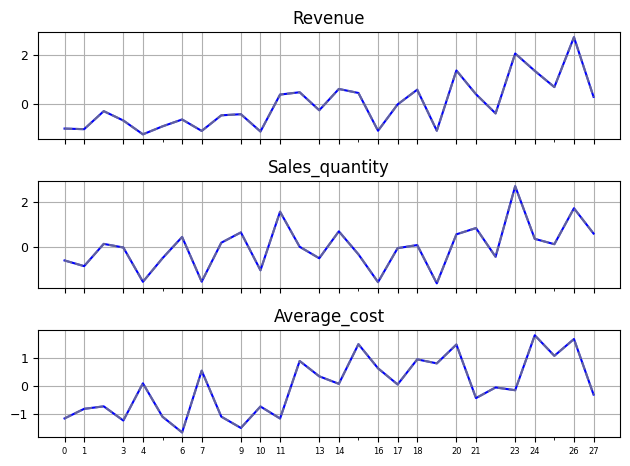

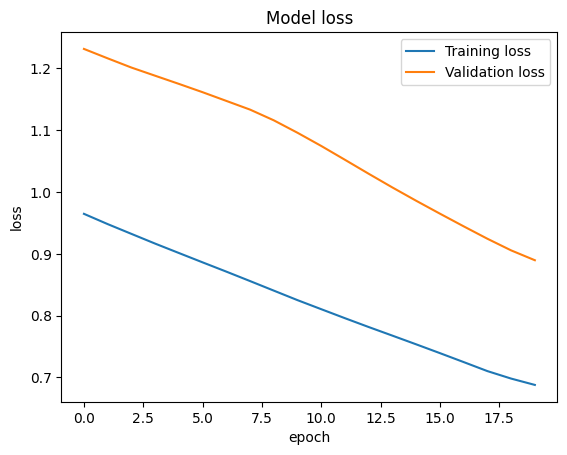

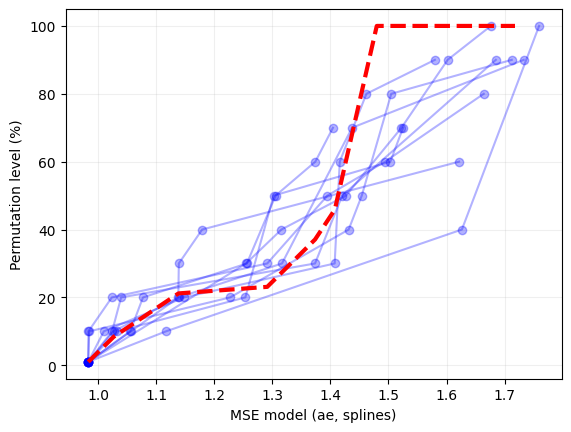

In [4]:
import random
import tensorflow as tf
tf.random.set_seed(42) 
np.random.seed(42)
random.seed(42)
print("Doing Primary Source Model -- \n" + "N = " + str(len(X_PS)) + " (" + str(np.round(len(X_PS)/(len(X_PS) + len(X_NEW))*100,2)) + " %" + " of total dataset length)")
ps_dict, ind_PS = smexp_dyn.get_PS_data(X_PS, resultspath = "../results/ds04/", dstitle = "DS 04 PS", 
                                        PSfilename = "ds04ps.pkl", mse_model_type="splines", pctge_PS=1, resultsfile="dyn-ds-04")

### New versions<br>
When a new version of the dataset is generated, it will be compared to the information from the previous version in the following way:<br>
  * $d_{P}$: computes the cosine distance between loading matrices obtained for both data sets;<br>
  * $d_{E, PCA}$: computes the MSE obtained by reconstructing the new batch using the reference PCA model. This value is fed into a quadratic model fitted with the reference data set, which relates MSE values to levels of corruption artificially simulated by permuting entries from the reference set.<br>
  * $d_{E, AE}$: computes the MSE obtained by reconstructing the new batch using the reference AE model. This value is fed into a quadratic model fitted with the reference data set, which relates MSE values to levels of corruption artificially simulated by permuting entries from the reference set.<br>


## Creation events<br>
The following experiments use an initial subset as reference and add new batches of different size. For this dataset, the batch sizes at the lowest levels (5% and 10%) do not hold enough observations for experiments with the $d_P$ distance to be carried out. Hence, an error message will be printed for them in these cases.

In [5]:
print("  - Case 1: add rows of new set \n")
try:
    smexp_dyn.do_exp(X_NEW, ps_dict, resultspath = "../results/ds04", mode_der = "add_batch", 
                     batchsize_pctges = [0.05, 0.1, 0.25, 0.5, 0.75, 1], dstitle="DS 04 batch addition", resultsfile="/dyn-ds-04-add",
                     fixedvariables=ps_dict["PS_dic"]["PCA"]["E"]["vbles_in_prepro"])
except Exception as e: print(e)

  - Case 1: add rows of new set 

New versions, level 0.05- start
There are not enough samples to run the experiments with this setup. Passing to the next level
New versions, level 0.1- start
There are not enough samples to obtain the dP metric with this setup.
New versions, level 0.1- end
New versions, level 0.25- start
New versions, level 0.25- end
New versions, level 0.5- start
New versions, level 0.5- end
New versions, level 0.75- start
New versions, level 0.75- end
New versions, level 1- start
New versions, level 1- end
DER: done


## Update events<br>

In [6]:
print("  - Case 2.1: transform columns ..\n")
try: 
    smexp_dyn.do_exp(X_PS, ps_dict, resultspath = "../results/ds04", mode_der = "trans_cols",
                    tr_pctges = [0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 1], dstitle="DS 04 cbrt scale", batchsize_pctges=[1], kfolds=1,
                    modetr="cbrt",resultsfile="/fixed-ds-04-trcols-cbrt")
except Exception as e: print(e)

  - Case 2.1: transform columns ..

New versions, level 0.05- start
New versions, level 0.05- end
New versions, level 0.1- start
New versions, level 0.1- end
New versions, level 0.3- start
New versions, level 0.3- end
New versions, level 0.5- start
New versions, level 0.5- end
New versions, level 0.7- start
New versions, level 0.7- end
New versions, level 0.8- start
New versions, level 0.8- end
New versions, level 1- start
New versions, level 1- end
DER: done


## Deletion events<br>
In the following cases, the reference set contains all the records and some of them are deleted in different ways: signals are down sampled, outliers are removed, etc.

In [7]:
print("  - Case 3: remove rows decimate .. \n")
try:
    smexp_dyn.do_exp(X_PS, ps_dict, resultspath = "../results/ds04", mode_der = "rem_rows_decimate", 
                            tr_pctges = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05], dstitle="DS 04 decimate", batchsize_pctges=[1], 
                            resultsfile="/fixed-ds-04-downsample")
except Exception as e: print(e)

  - Case 3: remove rows decimate .. 

New versions, level 0.5- start
New versions, level 0.5- end
New versions, level 0.4- start
New versions, level 0.4- end
New versions, level 0.3- start
New versions, level 0.3- end
New versions, level 0.2- start
New versions, level 0.2- end
New versions, level 0.1- start
New versions, level 0.1- end
New versions, level 0.05- start
New versions, level 0.05- end
DER: done
